In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import linalg

# Задача
В таблице приведены данные о численности населения некоторых крупнейших стран мира по годам с 1950 -2020 г.г. На основе этих данных для конкретного построить наилучший многочлен  по МНК. Найти численность  населения страны  в 2019 году  и сравнить полученное значение  с актуальным значением  (взять из интернета).   
Решить ту же  задачу на основе интерполяционного многочлена. То есть построить интерполяционный многочлен по значениям с 1950-2020 г.г. Вычислить значение  для 2019 года и сравнить с актуальными данными.   
Страна: $Россия$     
Таблица:   
$| \ 1950 \ |  \ 1960 \ | \ 1970 \ \ | \ 1980 \ | \ 1990 \ | \ 2000 \ | \ 2010 \ \ | \ 2020 \ \ | \\
| \ 112 \ \ \ | \ 123 \ \ \ | \ 132.5 \ | \ 139	\ \ \ | \ 150 \ \ \ | \ 144 \ \ \ | \ 142.9 \ | \ 146.7 \ |$

In [2]:
#Определим соответствующие массивы
x = np.array([1950.0, 1960.0, 1970.0, 1980.0, 1990.0, 2000.0, 2010.0, 2020.0])
y = np.array([112.0, 123.0, 132.5, 139.0, 150.0, 144.0, 142.9, 146.7])

In [3]:
class Least_squares:
    def __init__(self, x, y, order):
        self.size = order + 1
        self.x = x
        self.y = y
        self.b = np.zeros(self.size)
        self.s = np.zeros((self.size, self.size))
        self.a = np.zeros(self.size)
        
    def new_polynom(self):
        for i in range(self.size):
            for j in range(self.size):
                self.s[i][j] = np.sum([k**(i+j) for k in self.x])
            self.b[i] = np.sum([self.y[k]*(self.x[k]**i) for k in range(self.y.size)]) 
        self.a = linalg.solve(self.s, self.b)
        
    def MNK(self, x):
        return np.sum([self.a[i]*(x**i) for i in range(self.size)])

In [4]:
polynom1 = Least_squares(x, y, 1)
polynom2 = Least_squares(x, y, 2)
polynom3 = Least_squares(x, y, 6)
polynom1.new_polynom()
polynom2.new_polynom()
polynom3.new_polynom()

<ipython-input-3-04527c8d169e>:15: LinAlgWarning: Ill-conditioned matrix (rcond=8.69368e-22): result may not be accurate.
  self.a = linalg.solve(self.s, self.b)
<ipython-input-3-04527c8d169e>:15: LinAlgWarning: Ill-conditioned matrix (rcond=1.08895e-54): result may not be accurate.
  self.a = linalg.solve(self.s, self.b)


1) Полученная численность населения в 2019 году:  151.96321428571832
2) Полученная численность населения в 2019 году:  144.53769649751484
3) Полученная численность населения в 2019 году:  145.32898449525237
Официальная численность населения в 2019 году:  145.8
1) Полученная численность населения в 2023 году:  153.81035714286168
2) Полученная численность населения в 2023 году:  142.99569652904756
3) Полученная численность населения в 2023 году:  146.3560087196529
Текщая официальная численность населения в 2023 году:  146.4


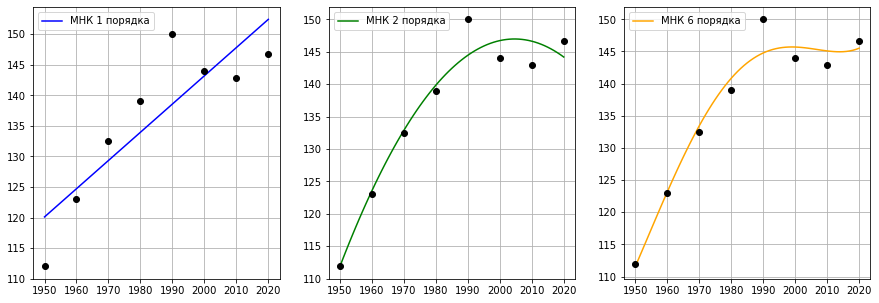

In [5]:
fig, axs = plt.subplots(1, 3, figsize = (15, 5))
axs[0].plot(np.arange(1950, 2021), [polynom1.MNK(i) for i in range(1950, 2021)], color = 'blue', label = 'МНК 1 порядка')
axs[1].plot(np.arange(1950, 2021), [polynom2.MNK(i) for i in range(1950, 2021)], color = 'green', label = 'МНК 2 порядка')
axs[2].plot(np.arange(1950, 2021), [polynom3.MNK(i) for i in range(1950, 2021)], color = 'orange', label = 'МНК 6 порядка')

axs[0].legend()
axs[1].legend()
axs[2].legend()

for i in range(3):
    axs[i].grid()
    axs[i].plot(x, y,'ko')
print("1) Полученная численность населения в 2019 году: ", polynom1.MNK(2019))
print("2) Полученная численность населения в 2019 году: ", polynom2.MNK(2019))
print("3) Полученная численность населения в 2019 году: ", polynom3.MNK(2019))
print("Официальная численность населения в 2019 году: ", 145.8)

print("1) Полученная численность населения в 2023 году: ", polynom1.MNK(2023))
print("2) Полученная численность населения в 2023 году: ", polynom2.MNK(2023))
print("3) Полученная численность населения в 2023 году: ", polynom3.MNK(2023))
print("Текщая официальная численность населения в 2023 году: ", 146.4)

In [6]:
class Inter_polynom:
    def __init__(self, x, y):
        self.size = x.size
        self.x = x
        self.y = y
        self.s = np.zeros((self.size, self.size))
        self.a = np.zeros(self.size)

    def new_polynom(self):
        for j in range(self.size):
            for i in range(self.size):
                self.s[i][j] = self.x[i]**j
        self.a = linalg.solve(self.s, self.y)
        
    def interpolation(self, x):
        return np.sum([self.a[i]*(x**i) for i in range(self.size)])

polynom = Inter_polynom(x, y)
polynom.new_polynom()

<ipython-input-6-3eda27860f34>:13: LinAlgWarning: Ill-conditioned matrix (rcond=1.16854e-38): result may not be accurate.
  self.a = linalg.solve(self.s, self.y)


Полученная численность населения в 2019 году:  154.0
Официальная численность населения в 2019 году:  145.8


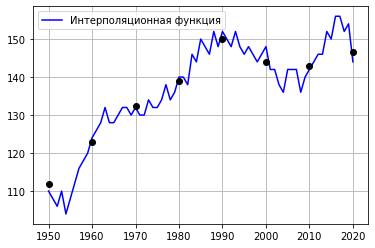

In [7]:
fig, axs = plt.subplots(1, 1)
axs.plot(np.arange(1950, 2021), [polynom.interpolation(i)  for i in range(1950, 2021)], color = 'blue', label = 'Интерполяционная функция')
axs.legend()
axs.grid()
axs.plot(x, y,'ko')
print("Полученная численность населения в 2019 году: ", polynom.interpolation(2019))
print("Официальная численность населения в 2019 году: ", 145.8)

# Задача
Дана функция. Приблизить функцию  методом интерполяции, используя многочлен Лагранжа. Степень многочлена N подобрать таким образом, чтобы максимальная величина погрешности на отрезке   не превышала заданной величины  Построить графики многочленов и графики погрешностей. Приблизить функцию  методом интерполяции, указанным в  индивидуальном варианте.

$ cos(4x)\ /\sqrt{x} \\ $
Отрезок: [1, 3]   
eps = 0.05   
Метод: Многочлен Эрмита

In [8]:
#Зададим имеющуюся информацию
a = 1
b = 3
eps = 0.05
def Func(x):
    return np.cos(4*x) / np.sqrt(x)
def dFunc(x):
    return -4*np.sin(4*x) / np.sqrt(x) - 0.5*np.cos(4*x) / x**(3/2)

In [9]:
#Значение точки x0 с помощью многочлена Лагранжа
def Lagrange(x, y, x0):
    res = 0
    for j in range(y.size):
        num = 1 
        denom = 1
        for i in range(x.size):
            if i != j:
                num = num*(x0 - x[i])
                denom = denom*(x[j]-x[i])
        res = res + y[j]*num/denom
    return res

In [10]:
#Значение точки x0 с помощью многочлена Эрмита
def Hermite(x, y, x0):
    res = 0
    for i in range(x.size):
        if (x0 >= x[i-1])&(x0 <= x[i]):
            h = x[i] - x[i-1]
            t = (x0 - x[i])/h
            res = ((1-t)**2)*(2*t + 1)*y[i-1] + (t**2)*(3-2*t)*y[i] + ((1-t)**2)*t*h*dFunc(x[i-1]) + (t**2)*(t-1)*h*dFunc(x[i])
    return res

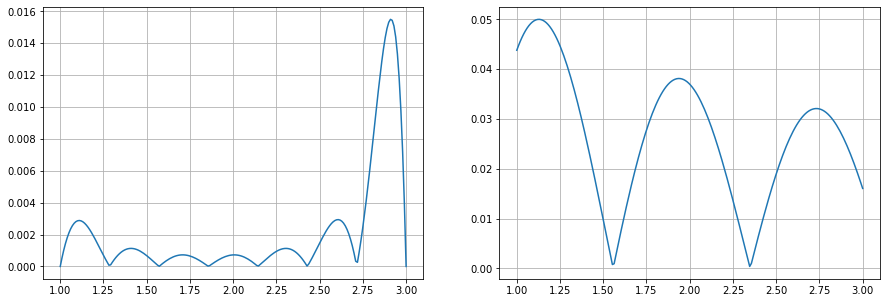

In [11]:
n1 = 4
n2 = 10
x = np.linspace(a, b, 200)
y = Func(x)
lagr = [Lagrange(np.linspace(a, b, n1), Func(np.linspace(a, b, n1)), i) for i in x]
herm = [Hermite(np.linspace(a, b, n2), Func(np.linspace(a, b, n2)), i) for i in x]

while eps <= np.amax(np.abs(y - lagr)):
    lagr = [Lagrange(np.linspace(a, b, n1), Func(np.linspace(a, b, n1)),i) for i in x]
    n1 += 1
    
while eps <= np.amax(np.abs(y - herm)):
    herm = [Hermite(np.linspace(a, b, n2), Func(np.linspace(a, b, n2)), i) for i in x]
    n2 += 1

fig, axs = plt.subplots(1, 2, figsize = (15, 5))
axs[0].plot(x, np.abs(y - lagr))
axs[0].grid()
axs[1].plot(x, np.abs(y - herm))
axs[1].grid()

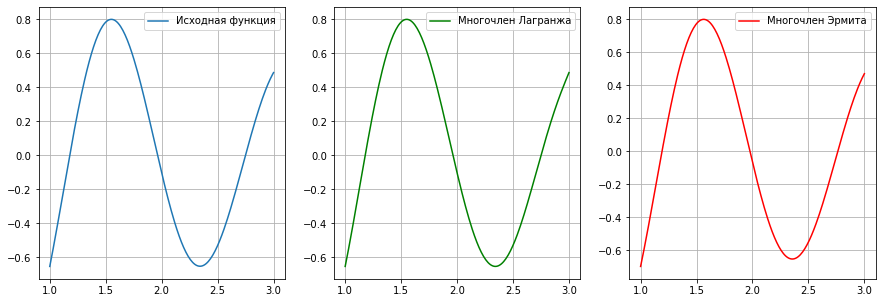

In [12]:
fig, axs = plt.subplots(1, 3, figsize = (15, 5))
axs[0].plot(x, y, label = 'Исходная функция')
axs[0].grid()
axs[1].plot(x, lagr, color = 'green', label = 'Многочлен Лагранжа')
axs[1].grid()
axs[2].plot(x, herm, color = 'red', label = 'Многочлен Эрмита')
axs[2].grid()
axs[0].legend()
axs[1].legend()
axs[2].legend()

# Задача
Задана функция, определенная на отрезке [-1; 1]. 
Требуется разложить функцию в ряд Тейлора в окрестности нуля с точностью   и произвести экономизацию полученного степенного ряда.
$ \\ x^{2}cos(x)$


In [13]:
#Определим функцию, вычисляющую коэффициенты
def Coeff(n):
    return (-1)**n / np.math.factorial(2*n)

#Определим функцию, вычисляющую частичную сумму ряда Тейлора
def Taylor(x, n):
    s = 0
    for i in range(n):
        s = s + Coeff(i)*(x**(2*i + 2))
    return s

#Определим исходную функцию
def Func(x):
    return x**2*np.cos(x)

n =  6


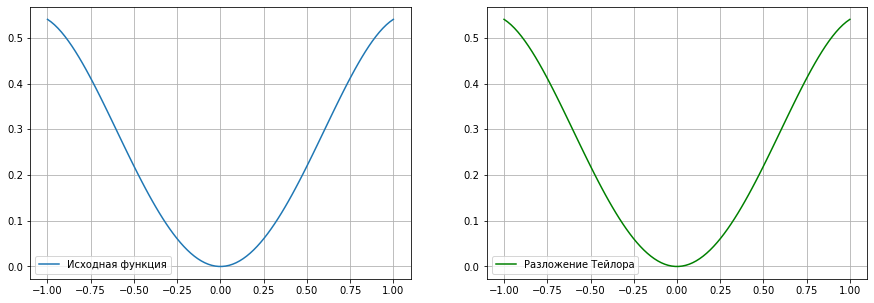

In [14]:
n = 0
x = np.linspace(-1, 1, 100)
eps = 1e-8
while np.amax(np.abs(Taylor(x, n) - Func(x))) >= eps:
    n += 1
print('n = ', n)

fig, axs = plt.subplots(1, 2, figsize = (15, 5))
axs[0].plot(x, Func(x), label = 'Исходная функция')
axs[1].plot(x, Taylor(x, n), color = 'green', label = 'Разложение Тейлора')
axs[0].grid()
axs[1].grid()
axs[0].legend()
axs[1].legend()

In [15]:
#Определим многочлен Чебышева реккурентным соотношением
def T(x, n):
    if n == 0:
        return 1
    if n == 1:
        return x
    return 2*x*T(x, n-1) - T(x, n-2)

#Т.к. n = 6, рассмотрим следующие формулы экономизации:
def X8(x):
    return (1/128)*(256*x**6 - 160*x**4 + 32*x**2 - 1 + T(x, 8))

def X7(x):
    return (1/64)*(112*x**5 - 56*x**3 + 7*x + T(x, 7))

def X6(x):
    return (1/32)*(48*x**4 - 18*x**2 + 1 + T(x, 6))

def X5(x):
    return (1/16)*(20*x**3 - 5*x + T(x, 5))

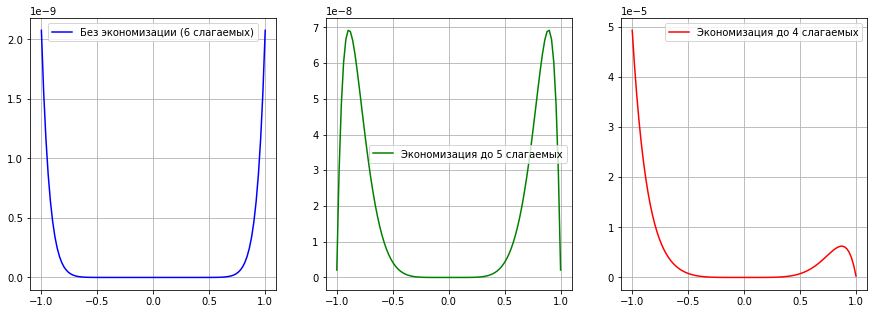

In [16]:
#Нарисуем графики погрешностей
#Из графиков следует, что ряд можно сократить до 5 слагаемых, т.к. погрешность не превышает заданную.
fig, axs = plt.subplots(1, 3, figsize = (15, 5))

axs[0].plot(x, np.abs(Func(x) - Taylor(x, 6)), color ='blue', label = 'Без экономизации (6 слагаемых)')
axs[1].plot(x, np.abs(Func(x) - Taylor(x, 5) - Coeff(5)*(X6(x))), color ='green', label = 'Экономизация до 5 слагаемых')
axs[2].plot(x, np.abs(Func(x) - Taylor(x, 4) - Coeff(4)*(X5(x))), color ='red', label = 'Экономизация до 4 слагаемых')

axs[0].grid()
axs[0].legend()
axs[1].grid()
axs[1].legend()
axs[2].grid()
axs[2].legend()